<a href="https://colab.research.google.com/github/ranabensalem757/projet-mls/blob/main/projetMLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

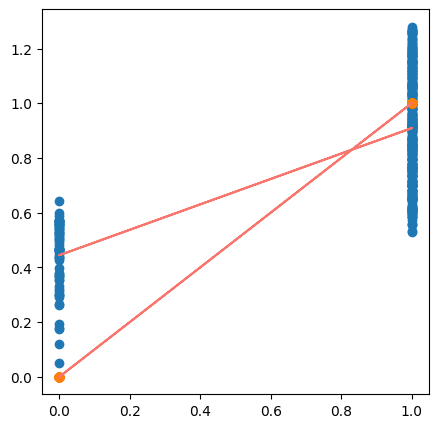

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dbbfa5b6f25ff81dce.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [5]:
import pandas as pd
df = pd.read_csv("studentPerformance.csv")
y = df['Pass_Fail']
x = df.drop('Pass_Fail', axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
from sklearn.metrics import mean_squared_error , r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_logreg_train_pred = logreg.predict(x_train)
y_logreg_test_pred = logreg.predict(x_test)
from sklearn.metrics import mean_squared_error , r2_score
logreg_train_mse = mean_squared_error(y_train, y_logreg_train_pred)
logreg_train_r2 = r2_score(y_train, y_logreg_train_pred)
logreg_test_mse = mean_squared_error(y_test, y_logreg_test_pred)
logreg_test_r2 = r2_score(y_test, y_logreg_test_pred)
logreg_results = pd.DataFrame(['Logistic regression', logreg_train_mse, logreg_train_r2, logreg_test_mse, logreg_test_r2]).transpose()
logreg_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
df_models = pd.concat([lr_results, logreg_results], axis=0)
df_models.reset_index(drop=True)


import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(y_train, y_lr_train_pred)
z= np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),'#F8766D')
plt.scatter(y_train, y_logreg_train_pred)
c= np.polyfit(y_train, y_logreg_train_pred, 1)
p = np.poly1d(c)
plt.plot(y_train,p(y_train),'#F8766D')
plt.show()
df_models
import gradio as gr
import joblib

class DummyModel:
    def predict(self, X):
        return [
            X["Study_Hours"][0]*10 +
            X["Attendance"][0]*0.3 +
            X["Practice_Tests"][0]*5
        ]
lr = DummyModel()
def predict_score(study_hours, attendance, practice_tests):

    input_data = pd.DataFrame({
        'Study_Hours': [study_hours],
        'Attendance': [attendance],
        'Practice_Tests': [practice_tests]
    })

    predicted_score = lr.predict(input_data)[0]

    result = "Pass " if predicted_score >= 50 else "Fail "

    return round(predicted_score, 2), result

interface = gr.Interface(
    fn=predict_score,
    inputs=[
        gr.Slider(0, 10, step=0.1, label="Study Hours"),
        gr.Slider(50, 100, step=1, label="Attendance (%)"),
        gr.Number(label="Practice Tests", value=0)
    ],
    outputs=[
        gr.Label(label="Predicted Final Score"),
        gr.Label(label="Predicted Result (Pass/Fail)")
    ],
    title="Student Performance Predictor",
    description="Prédit le score final (Final_Score) et le résultat (Pass_Fail) d’un étudiant selon ses heures d’étude, sa présence et ses tests pratiques.",
    examples=[
        [2, 60, 1],
        [6, 85, 3],
        [9, 95, 8]
    ]
)
interface.launch(share=True)